# Coffee Fruit Maturity Object Detection

<!DOCTYPE html>
<html lang=”en”>
   <body>
      <!--Centered Image Start-->
      <div style="text-align: center;">
         <img width="500" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/SDAIA-Logo-2.png/1200px-SDAIA-Logo-2.png" alt="Tuwaiq Academy">
      </div>

   </body>
</html>

<div style="text-align: center;">
     
<h2>Group Members</h2>
<h3>Salwa Bukhari (salwa.bukhari9@gmail.com) </h3>
<h3>Sara Alsadoun (SaraAlsadoun@hotmail.com)</h3>
<h3>Mussab Al-bargi (Albargi-454@hotmail.com) </h3>
<h3>Abdulrahman Ghazwani (d.m1999y@gmail.com)</h3>
<h3>Azzam Garwan (azzamgarwan0@gmail.com) </h3>

  </div>    
</body>
</html>

### Problem Statement
#### Accurate determination of coffee fruit maturity is essential for optimizing harvesting timing and ensuring the production of high-quality coffee beans. Traditional methods for assessing coffee fruit maturity rely on visual inspection, which is subjective, time-consuming, and prone to human error. These limitations lead to inconsistencies in harvesting practices and can result in premature or delayed harvesting, negatively impacting the quality and yield of coffee beans.

#### To address these challenges, we propose developing a coffee fruit maturity recognition model using YOLOv8, an advanced object detection algorithm that has demonstrated high accuracy and efficiency in various applications. The model will be trained on a large and diverse dataset of coffee fruit images representing different maturity stages, enabling it to accurately classify coffee fruits based on their color, size.

## Mounting to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Import the required libraries

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
%pip install ultralytics
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 26.9/166.8 GB disk)


In [ ]:
pip install --force-reinstall numpy==1.23.0

## Training the Model

In [ ]:
!yolo train model="/content/drive/MyDrive/runs/detect/train/weights/best.pt" data="/content/drive/MyDrive/coffee_dataset/Coffee Fruit MaturityV8/Coffee Fruit Maturity ---.v1i.yolov8/data.yaml" epochs=200 imgsz=640

Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/runs/detect/train/weights/best.pt, data=/content/drive/MyDrive/coffee_dataset/Coffee Fruit MaturityV8/Coffee Fruit Maturity ---.v1i.yolov8/data.yaml, epochs=200, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_fra

## Showing Predicted Results


image 1/1 /content/drive/MyDrive/IMG_9891.jpg: 640x640 38 ripes, 40 semi_ripes, 35 unripes, 87.8ms
Speed: 14.3ms preprocess, 87.8ms inference, 50.3ms postprocess per image at shape (1, 3, 640, 640)


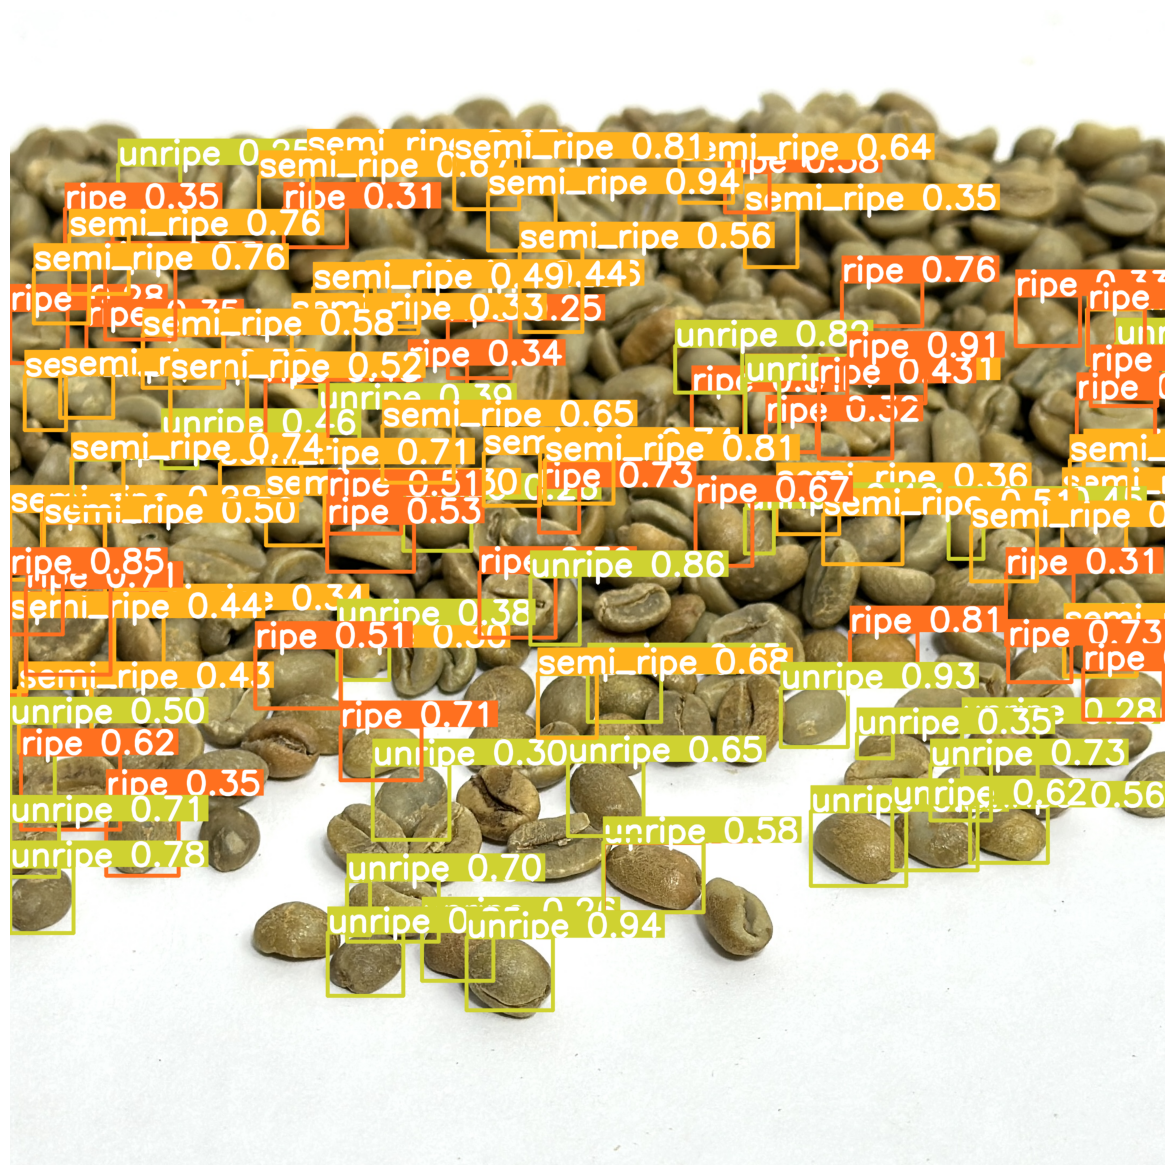

In [3]:
imageUrl = '/content/drive/MyDrive/IMG_9891.jpg'

model = YOLO('/content/drive/MyDrive/runs/detect/train/weights/best.pt')
model.conf = 0.1

results = model(imageUrl)

results_image = results[0].plot()
plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(results_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Save The Best *Weights*

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model = YOLO('/content/runs/detect/train/weights/best.pt')

model.export(format='saved_model')

##Test The Model

In [ ]:
from ultralytics import YOLO


model = YOLO('yolov8n.pt')
model = YOLO('/content/drive/MyDrive/runs/detect/train/weights/best.pt')


metrics = model.val()
metrics.box.map
metrics.box.map50
metrics.box.map75
metrics.box.maps

Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68128383 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /content/drive/MyDrive/coffee_dataset/Coffee Fruit MaturityV8/Coffee Fruit Maturity ---.v1i.yolov8/test/labels... 85 images, 0 backgrounds, 0 corrupt: 100%|██████████| 85/85 [00:22<00:00,  3.71it/s]

val: WARNING ⚠️ /content/drive/MyDrive/coffee_dataset/Coffee Fruit MaturityV8/Coffee Fruit Maturity ---.v1i.yolov8/test/images/2_20211204_111100_jpg.rf.700770d0d9eae6eda568302baf8b2c2f.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/coffee_dataset/Coffee Fruit MaturityV8/Coffee Fruit Maturity ---.v1i.yolov8/test/images/IMG_20230824_102448_jpg.rf.c7051f4ab4a7785b5a8e657b9e08a460.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/coffee_dataset/Coffee Fruit MaturityV8/Coffee Fruit Maturity ---.v1i.yolov8/test/images/IMG_20230824_102657_1_jpg.rf.63de3c05ba4ca631e7307b7faeec1ed6.jpg: 6 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/coffee_dataset/Coffee Fruit MaturityV8/Coffee Fruit Maturity ---.v1i.yolov8/test/images/IMG_20230824_102900_jpg.rf.09ff46a23cd97835872ec63af44caade.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/coffee_dataset/Coffee Fruit MaturityV8/Coffee Fruit Maturity ---.v1i.yolov8/test/imag


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:16<00:00,  2.73s/it]


                   all         85       1130      0.703      0.671      0.692      0.657
                   dry         85         27      0.828      0.535      0.711      0.685
              overripe         85         19      0.383      0.526      0.299      0.251
                  ripe         85        122      0.634      0.779      0.732      0.701
             semi_ripe         85        123      0.772       0.61      0.765      0.729
                unripe         85        839      0.899      0.906      0.951       0.92
Speed: 2.2ms preprocess, 66.4ms inference, 0.0ms loss, 16.5ms postprocess per image
Results saved to runs/detect/val4


array([    0.68538,     0.25094,     0.70076,     0.72899,     0.92003])

# Reference To Dataset:

- https://www.kaggle.com/datasets/cienciacafeto/coffee-fruit-maturity